<a href="https://colab.research.google.com/github/nilradi/DS-Projects/blob/main/P1_Uber_Trips_Analysis_NY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importamos librerias

import pandas as pd
import matplotlib.pyplot as plt
import datetime

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#abrimos dataset

uberdf = pd.read_csv("/content/drive/MyDrive/proyectos/Data/uber-raw-data-sep14.csv")

In [ ]:
uberdf.head()

,Date/Time,Lat,Lon,Base
0,9/1/2014 0:01:00,40.2201,-74.0021,B02512
1,9/1/2014 0:01:00,40.7500,-74.0027,B02512
2,9/1/2014 0:03:00,40.7559,-73.9864,B02512
3,9/1/2014 0:06:00,40.7450,-73.9889,B02512
4,9/1/2014 0:11:00,40.8145,-73.9444,B02512


In [ ]:
uberdf.info()
# vemos que la columna date/time está como object

In [ ]:
# Cambiamos la columna de string a datetime
uberdf['Date/Time'] = pd.to_datetime(uberdf['Date/Time'])

In [ ]:
uberdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028136 entries, 0 to 1028135
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype         
---  ------     --------------    -----         
 0   Date/Time  1028136 non-null  datetime64[ns]
 1   Lat        1028136 non-null  float64       
 2   Lon        1028136 non-null  float64       
 3   Base       1028136 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 31.4+ MB


In [ ]:
uberdf['Day'] = uberdf['Date/Time'].apply(lambda x: x.day)
uberdf['Hour'] = uberdf['Date/Time'].apply(lambda x: x.hour)
uberdf['Weekday'] = uberdf['Date/Time'].apply(lambda x: x.weekday())

In [ ]:
uberdf.head()

,Date/Time,Lat,Lon,Base,Day,Hour,Weekday
0,2014-09-01 00:01:00,40.2201,-74.0021,B02512,1,0,0
1,2014-09-01 00:01:00,40.7500,-74.0027,B02512,1,0,0
2,2014-09-01 00:03:00,40.7559,-73.9864,B02512,1,0,0
3,2014-09-01 00:06:00,40.7450,-73.9889,B02512,1,0,0
4,2014-09-01 00:11:00,40.8145,-73.9444,B02512,1,0,0


Text(0.5, 1.0, 'Densidad de viajes por día')

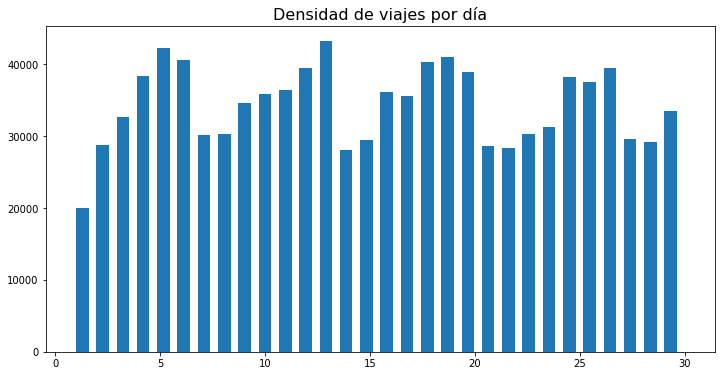

In [ ]:
# Visualizamos la densidad de viajes por día del mes

fig, ax = plt.subplots(figsize = (12,6))
plt.hist(uberdf.Day, width = 0.6, bins = 30)
#30 bins por los 30 días del mes
plt.title("Densidad de viajes por día", fontsize = 16)


In [ ]:
# Se puede apreciar cierta estacionalidad en la cantidad de viajes por día del mes, los laborales hay mas densidad mientras que los fines de semana hay menos actividad.

Text(0.5, 1.0, 'Densidad de viajes por día de la semana')

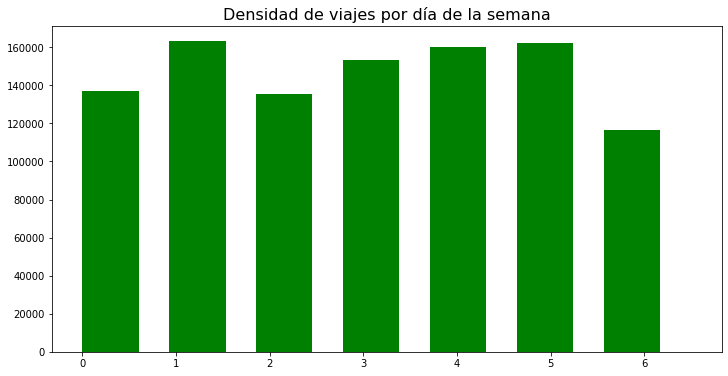

In [ ]:
fig, ax = plt.subplots(figsize = (12,6))
plt.hist(uberdf.Weekday, width = 0.6, range = (0, 6.5), bins = 7, color = 'g')
#ponemos el range para cuadrarlo
plt.title('Densidad de viajes por día de la semana', fontsize = 16)

In [ ]:
#los lunes (1), es el dia con mayor numero de viajes, curioso que el fin de semana (6 y 0), sean los que menos densidad tienen. Viernes y jueves muy concurridos.

Text(0.5, 1.0, 'Densidad de viajes por hora')

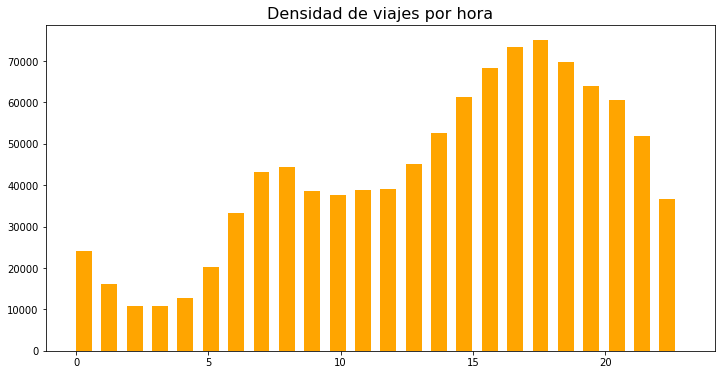

In [ ]:
fig, ax = plt.subplots(figsize = (12,6))
plt.hist(uberdf.Hour, width = 0.6, bins = 24, color = 'orange')
#ponemos el range para cuadrarlo
plt.title('Densidad de viajes por hora', fontsize = 16)

In [ ]:
# como podemos apreciar, las horas con mayor densidad de viajes son las de la tarde, creciendo exponencialmente desde las 14h, siendo el peak time a las 18h de la tarde aprox

Text(0.5, 1.0, 'Densidad de viajes geográficamente')

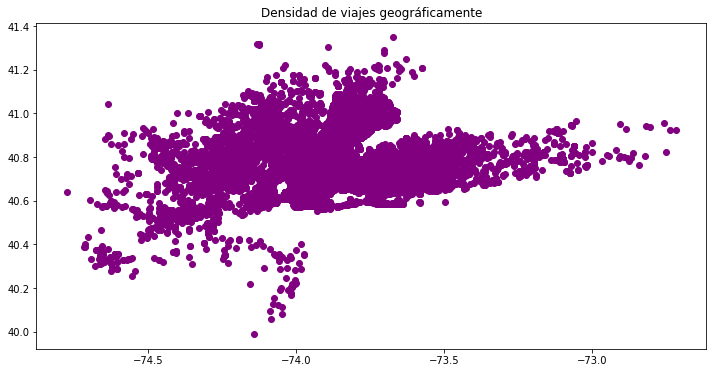

In [ ]:
fig, ax = plt.subplots(figsize = (12,6))
x = uberdf.Lon
y = uberdf.Lat
plt.scatter(x, y, color = 'purple')
plt.title('Densidad de viajes geográficamente')

In [ ]:
# viendo la latencia y longitud, la mayor densidad de viajes es por la zona de Manhattan, la región menos transitada es New Jersey